In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:

# Cargar el archivo df_train.parquet y df_test.parquet
train_dataset = pd.read_parquet('df_train.parquet')
test_dataset  = pd.read_parquet('df_test.parquet')

In [3]:
train_dataset.head()

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Target,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
16484,12.0,3.0,3.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,58373.057143,-110021.200000,1.885690e+05
11528,6.0,1.0,1.0,2,0.5,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,19618.942857,-36176.133333,9.747050e+04
26630,1.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,1,398534.000000,-626628.000000,2.304723e+06
12586,6.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,1292.600000,13410.733333,5.380450e+04
11225,3.0,0.0,2.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,0,13728.714286,-27375.666667,4.134967e+04


In [4]:
# Descripción de los tipos de datos del dataframe
print(train_dataset.dtypes)

MEDICAMENTOS                     float64
MEDICINA ESPECIALIZADA           float64
MEDICINA GENERAL                 float64
Cant_gr_flia                       int64
Cant_riesgos_flia_mean           float64
min_Tiempo_CP_Fliar              float64
Cant_Fliar_CP                    float64
psa_max_gr_flia                  float64
psa_min_gr_flia                  float64
Cant_Fliar_riesgos               float64
cantidad_serv_flia               float64
Pendiente_flia                   float64
Intercepto_flia                  float64
Promedio_costo_flia              float64
ESTADO_CIVI                       object
PROGRAMA                          object
estrato                           object
IMC                               object
AGRUPACION_SISTOLICA              object
AGRUPACION_DIASTOLICA             object
parentesco                        object
EDAD                             float64
RIESGOS                          float64
CANTIDAD_SERVICIOS               float64
PERDIDA_DE_PESO 

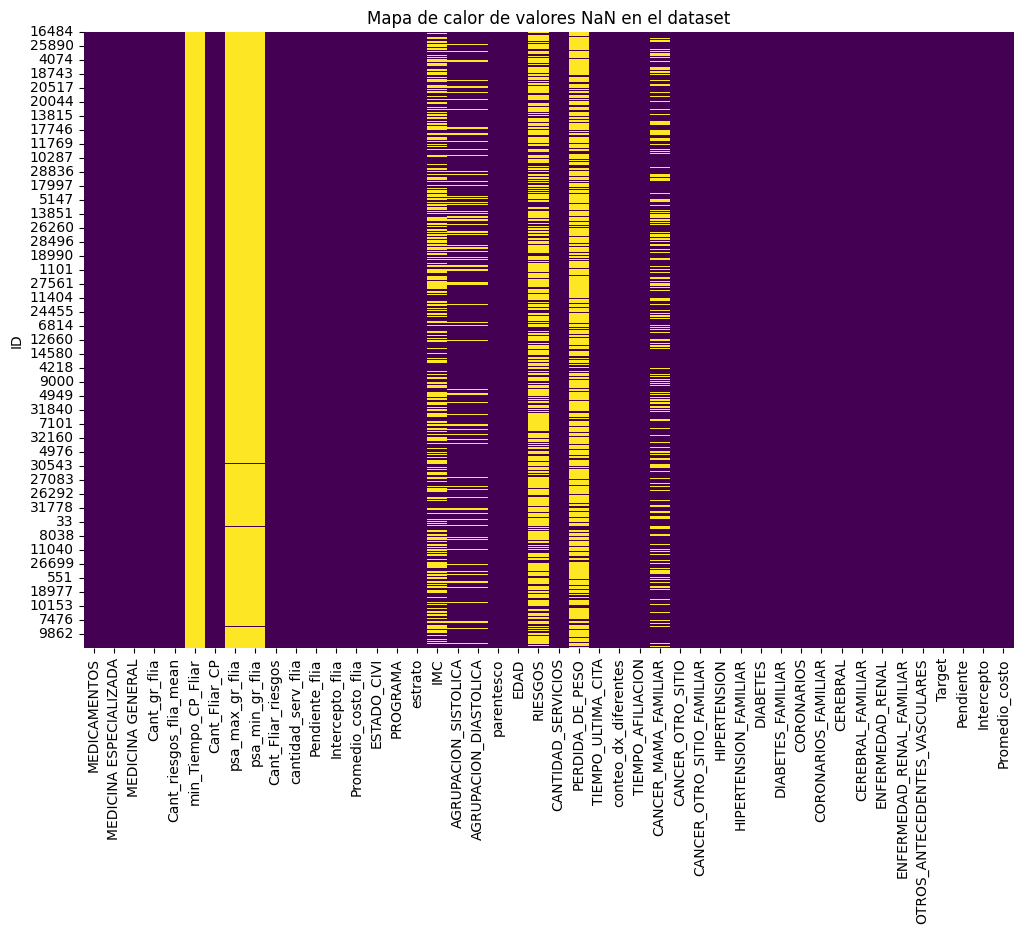

In [5]:
# Generar un mapa de calor de los valores NaN en el dataset
plt.figure(figsize=(12, 8))
sns.heatmap(train_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores NaN en el dataset')
plt.show()

In [6]:
# Calcular el porcentaje de valores NaN en cada columna
nan_percentage = (train_dataset.isnull().sum() / len(train_dataset)) * 100

# Calcular el porcentaje de valores NaN en cada columna, excluyendo las columnas que no tienen faltante
nan_percentage_filtered = nan_percentage[nan_percentage > 0].sort_values()
print(nan_percentage_filtered)

AGRUPACION_SISTOLICA     14.131268
AGRUPACION_DIASTOLICA    14.131268
CANCER_MAMA_FAMILIAR     28.952073
IMC                      44.113391
RIESGOS                  69.307057
PERDIDA_DE_PESO          75.436282
psa_max_gr_flia          99.301949
psa_min_gr_flia          99.301949
min_Tiempo_CP_Fliar      99.965949
dtype: float64


In [7]:
# BEGIN: Add columns with more than 75% missing values to columns_to_drop list
columns_to_drop = nan_percentage[nan_percentage > 75].index.tolist()
print(columns_to_drop)
# END: Add columns with more than 75% missing values to columns_to_drop list

['min_Tiempo_CP_Fliar', 'psa_max_gr_flia', 'psa_min_gr_flia', 'PERDIDA_DE_PESO']


In [8]:
train_dataset = train_dataset.drop(columns=columns_to_drop, axis=1)
test_dataset = test_dataset.drop(columns=columns_to_drop, axis=1)

# Mostrar las primeras filas del dataset limpio
train_dataset.head()

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,Cant_Fliar_CP,Cant_Fliar_riesgos,cantidad_serv_flia,Pendiente_flia,Intercepto_flia,...,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Target,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
16484,12.0,3.0,3.0,2,0.0,0.0,0.0,34.0,15998.485714,-23363.200000,...,0,0,0,0,0,0,0,58373.057143,-110021.200000,1.885690e+05
11528,6.0,1.0,1.0,2,0.5,0.0,1.0,25.0,655.200000,-1019.200000,...,0,0,0,0,0,0,0,19618.942857,-36176.133333,9.747050e+04
26630,1.0,0.0,2.0,2,0.0,0.0,0.0,36.0,342236.971429,-521835.400000,...,0,0,0,0,0,0,1,398534.000000,-626628.000000,2.304723e+06
12586,6.0,0.0,2.0,2,0.0,0.0,0.0,24.0,-4468.285714,30687.333333,...,0,0,0,0,0,0,0,1292.600000,13410.733333,5.380450e+04
11225,3.0,0.0,2.0,1,1.0,0.0,1.0,7.0,0.000000,0.000000,...,2,2,2,2,2,2,0,13728.714286,-27375.666667,4.134967e+04


Separación de variables

In [9]:
numerical = train_dataset.select_dtypes(include=np.number).columns.tolist()
numerical.remove('Target')

nominal = train_dataset.select_dtypes(exclude=np.number).columns.tolist()
#nominal

ordinal = []


X = train_dataset[nominal + ordinal + numerical] 
y = train_dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

X_Kaggle_test = test_dataset[nominal + ordinal + numerical]

Pipelines auxiliares

Para separar mejor el procesamiento de nuestros datos, utilizamos tres pipelines auxiliares

In [11]:
# Pipeline datos ordinales
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

# Pipeline datos nominales
nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=True, handle_unknown="ignore"))
])

# Pipeline datos numéricos
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pegado de los tres pipelines
preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

In [ ]:
#ML_model = Lasso(alpha=190)
# ML_model = Ridge(alpha=20)
ML_model = LinearRegression()

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ML_model)
])